<a href="https://colab.research.google.com/github/tintenderete/TFM-Algoritmo-con-redes-evolutivas/blob/main/TFM__TABULAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATOS

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np

# Fechas de inicio y fin
start_date = "2016-01-04"
end_date = "2022-12-30"


ticker_componentes_IBEX = ['BKT', 'IBE', 'REP', 'TEF', 'ACS', 'FER', 'IDR', 'BBVA', 'ITX', 'SAN',
       'ENG', 'SAB', 'MAP', 'GRF', 'MTS', 'AMS', 'IAG', 'CABK', 'SCYR', 'ELE',
       'ACX', 'AENA', 'ANA', 'MRL', 'CLNX', 'MEL', 'COL', 'NTGY', 'SLR', 'FDR',
       'ROVI', 'RED', 'ANE', 'LOG', 'UNI']

ticker_componentes_IBEX = [ticker + ".MC" for ticker in ticker_componentes_IBEX]
"""
tickers = {
    "SP500": "^GSPC",
    "DAX": "^GDAXI",
    "EUROSTOXX": "^STOXX50E",
    "Oro": "GC=F",       # Oro (futuros)
    "Cobre": "HG=F",     # Cobre (futuros)
    "Dólar/Euro": "USDEUR=X",     # Precio del dólar en euros
    "Yuan/Euro": "CNYEUR=X"     # Precio del rublo en euros
}"""
tickers_indices = ["^IBEX", "^GSPC", "^GDAXI", "^STOXX50E", "GC=F", "HG=F", "USDEUR=X","CNYEUR=X"]

data_componentes_IBEX = yf.download(  ticker_componentes_IBEX,  start=start_date, end=end_date)["Adj Close"]
data_indices =          yf.download(  tickers_indices,          start=start_date, end=end_date)["Adj Close"]



[*********************100%%**********************]  35 of 35 completed
[*********************100%%**********************]  8 of 8 completed


In [ ]:
dates = pd.date_range(start_date, end_date)
business_days = pd.date_range(start=start_date, end=end_date, freq='B')

In [ ]:
data_componentes_IBEX = data_componentes_IBEX.reindex(dates)
data_indices =          data_indices.reindex(dates)

In [ ]:
data_componentes_IBEX.shape, data_indices.shape

((2553, 35), (2553, 8))

In [ ]:
# NUMERO DE NANS TOTALES

print( data_componentes_IBEX.isna().sum())
print( data_indices.isna().sum())

ACS.MC      762
ACX.MC      762
AENA.MC     762
AMS.MC      762
ANA.MC      762
ANE.MC     2168
BBVA.MC     762
BKT.MC      762
CABK.MC     762
CLNX.MC     762
COL.MC      762
ELE.MC      762
ENG.MC      762
FDR.MC      762
FER.MC      762
GRF.MC      762
IAG.MC      762
IBE.MC      762
IDR.MC      762
ITX.MC      762
LOG.MC      762
MAP.MC      762
MEL.MC      762
MRL.MC      762
MTS.MC      762
NTGY.MC     762
RED.MC      762
REP.MC      762
ROVI.MC     762
SAB.MC      762
SAN.MC      762
SCYR.MC     762
SLR.MC      762
TEF.MC      762
UNI.MC     1145
dtype: int64
CNYEUR=X     731
GC=F         795
HG=F         795
USDEUR=X     732
^GDAXI       779
^GSPC        792
^IBEX        763
^STOXX50E    791
dtype: int64


In [ ]:
# NUMERO DE NANS TOTALES EN DIAS LABORALES

print(
    data_componentes_IBEX[data_componentes_IBEX.index.isin(business_days)].isna().sum()
)

print(
    data_indices[data_indices.index.isin(business_days)].isna().sum()
)

ACS.MC       34
ACX.MC       34
AENA.MC      34
AMS.MC       34
ANA.MC       34
ANE.MC     1440
BBVA.MC      34
BKT.MC       34
CABK.MC      34
CLNX.MC      34
COL.MC       34
ELE.MC       34
ENG.MC       34
FDR.MC       34
FER.MC       34
GRF.MC       34
IAG.MC       34
IBE.MC       34
IDR.MC       34
ITX.MC       34
LOG.MC       34
MAP.MC       34
MEL.MC       34
MRL.MC       34
MTS.MC       34
NTGY.MC      34
RED.MC       34
REP.MC       34
ROVI.MC      34
SAB.MC       34
SAN.MC       34
SCYR.MC      34
SLR.MC       34
TEF.MC       34
UNI.MC      417
dtype: int64
CNYEUR=X      3
GC=F         67
HG=F         67
USDEUR=X      4
^GDAXI       51
^GSPC        64
^IBEX        35
^STOXX50E    63
dtype: int64


In [ ]:
# ELIMINAR DEL DATA SET ANE.MC y UNI.MC

data_componentes_IBEX.drop(["ANE.MC"],axis = 1, inplace=True)
data_componentes_IBEX.drop(["UNI.MC"],axis = 1, inplace=True)

In [ ]:
# RELLENAR NANS

data_componentes_IBEX = data_componentes_IBEX.fillna(method="ffill")
data_indices = data_indices.fillna(method="ffill")

print(data_componentes_IBEX.isna().sum().sum())
print(data_indices.isna().sum().sum())

0
0


In [ ]:
data_componentes_IBEX.head()

ACS.MC    ACX.MC    AENA.MC     AMS.MC     ANA.MC   BBVA.MC  \
2016-01-04  15.980108  5.751739  79.277679  36.199360  60.231133  4.407446   
2016-01-05  16.011045  5.890941  79.734390  36.367851  60.508469  4.436830   
2016-01-06  15.887271  5.630723  79.315735  36.458935  60.346691  4.342002   
2016-01-07  15.447846  5.364236  77.907539  35.552700  58.127888  4.286576   
2016-01-08  15.206470  5.406247  78.630669  35.038101  58.089367  4.189745   

              BKT.MC   CABK.MC    CLNX.MC    COL.MC  ...    MTS.MC    NTGY.MC  \
2016-01-04  4.751967  2.298498  14.772963  5.183413  ...  7.146005  10.938683   
2016-01-05  4.754171  2.279122  14.747093  5.223532  ...  7.577411  11.072263   
2016-01-06  4.649079  2.198032  14.574610  5.055031  ...  7.086566  10.989147   
2016-01-07  4.581466  2.142059  14.600484  4.894554  ...  6.708846  10.891190   
2016-01-08  4.524879  2.115507  14.238275  4.886530  ...  6.467259  10.768416   

               RED.MC    REP.MC    ROVI.MC    SAB.MC    SAN.MC   SCYR.MC  \
2016-01-04  11.855686  6.404623  12.837637  1.201982  3.033154  1.313086   
2016-01-05  11.923389  6.347961  12.837637  1.198304  3.007060  1.333093   
2016-01-06  11.899773  6.166517  12.846616  1.186534  2.910235  1.284186   
2016-01-07  11.828919  5.922047  12.765820  1.158581  2.850492  1.210084   
2016-01-08  11.776965  5.684579  13.017186  1.120330  2.773582  1.202673   

            SLR.MC    TEF.MC  
2016-01-04   0.700  5.248940  
2016-01-05   0.745  5.275911  
2016-01-06   0.720  5.237834  
2016-01-07   0.700  5.197639  
2016-01-08   0.700  5.072830  

[5 rows x 33 columns]

In [ ]:
import matplotlib.pyplot as plt

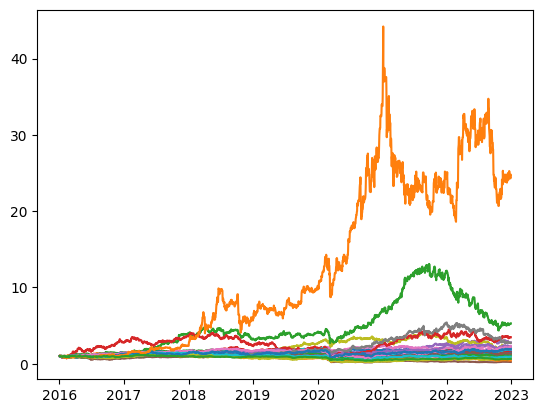

In [ ]:
plt.plot(data_componentes_IBEX / data_componentes_IBEX.iloc[0,:]);

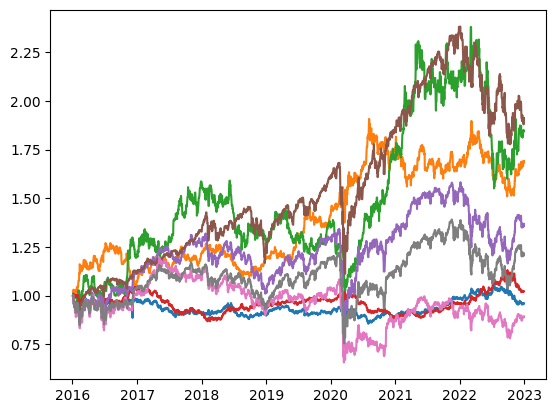

In [ ]:
plt.plot(data_indices / data_indices.iloc[0,:]);

# CREAR DATASET

In [ ]:
def calculate_sharpe_ratio(returns, risk_free_rate):
    return (np.mean(returns) - risk_free_rate) / np.std(returns)

In [ ]:

def create_dataset(ibex_data, bench, _days_backward=28, _days_forward = 7 , _days_steps = 1, create_suffle_data = True, b_sharpe = True):
  days_steps = _days_steps
  days_backward = _days_backward
  days_forward =  _days_forward

  datos_analisis = ibex_data
  datos_analisis_bench = bench
  X_DATA = []
  Y_DATA = []
  X_DATA_POS = []
  Y_REAL_FORWARD_SHARPE = []

  for i in range(days_backward, len(datos_analisis), days_steps):

      X_forward = datos_analisis[i:i+days_forward]

      X_data = datos_analisis[i-days_backward:i]
      # Norm todos empiezan en 1
      X_data = X_data/ X_data.iloc[0,:]

      X_data_bench = datos_analisis_bench[i-days_backward:i]
      # Norm todos empiezan en 1
      X_data_bench = X_data_bench/ X_data_bench.iloc[0]

      ## RETONORNOS
      last_day = X_data.iloc[X_data.shape[0]-1,:]
      returns_n = 2 * (last_day - last_day.min()) / (last_day.max() - last_day.min()) - 1

      ## MAXIMOS
      x_max =  X_data.max()
      max_n = 2 * (x_max - x_max.min()) / (x_max.max() - x_max.min()) - 1

      ## MINIMOS
      x_min = X_data.min()
      min_n = 2 * (x_min - x_min.min()) / (x_min.max() - x_min.min()) - 1

      ## STD
      x_std = X_data.std()
      std_n = 2 * (x_std - x_std.min()) / (x_std.max() - x_std.min()) - 1

      ## MEDIA
      x_mean = X_data.mean()
      mean_n = 2 * (x_mean - x_mean.min()) / (x_mean.max() - x_mean.min()) - 1

      if b_sharpe == True :
        ## SHARPE
        x_sharpe = x_mean / (x_std + 0.000001)
        sharpe_n = 2 * (x_sharpe - x_sharpe.min()) / (x_sharpe.max() - x_sharpe.min()) - 1


      ## ALPHA Y BETA

      betas = {}
      alphas = {}

      market_returns = X_data_bench.diff().dropna()
      df = X_data.diff().dropna()

      # Para cada activo, calcular beta y alpha
      for column in df.columns:
          asset_returns = df[column]

          # Calcula el beta
          cov_matrix = np.cov(asset_returns, market_returns)
          beta = cov_matrix[0, 1] / cov_matrix[1, 1]
          betas[column] = beta

          # Calcula el alpha
          alpha = asset_returns.mean() - beta * market_returns.mean()
          alphas[column] = alpha

      betas_series = pd.Series(betas)
      alphas_series = pd.Series(alphas)

      beta_n = 2 * (betas_series - betas_series.min()) / (betas_series.max() - betas_series.min()) - 1
      alpha_n = 2 * (alphas_series - alphas_series.min()) / (alphas_series.max() - alphas_series.min()) - 1

      rs = calculate_sharpe_ratio(np.log(X_forward).diff().dropna(), 0)
      Y_REAL_FORWARD_SHARPE.append(rs)
      y = np.argsort(np.argsort(-rs))
      y_n = 2 * (y - y.min()) / (y.max() - y.min()) - 1
      #print(y)
      #print(y_n)
      # TODO: Unir returns_n, max_n, min_n, std_n, mean_n, sharpe_n, beta_n, alpha_n , en un solo dataframe

      # Unir todas las series en un DataFrame

      if b_sharpe == True :
        features_df = pd.concat([returns_n, max_n, min_n, std_n, mean_n, sharpe_n, beta_n, alpha_n], axis=1)
      else:
        features_df = pd.concat([returns_n, max_n, min_n, std_n, mean_n, beta_n, alpha_n], axis=1)

      # Nombrar las columnas
      #features_df.columns = ['returns', 'max', 'min', 'std', 'mean', 'sharpe', 'beta', 'alpha']


      if create_suffle_data == True :
        for _ in range(10):
          t = features_df.reset_index(drop=True)
          t = pd.concat([t, y_n.reset_index(drop=True) ], axis=1).sample(frac=1)

          p = t.iloc[:,-1]
          t = t.iloc[:,:-1]

          X_DATA.append(t)
          Y_DATA.append(p)
          X_DATA_POS.append(t.index)
      else:
          X_DATA.append(features_df)
          Y_DATA.append(y_n)
          X_DATA_POS.append(features_df.index)



      #print(features_df)
      #print(y)
      #print(rs)

  return np.array(X_DATA) , np.array(Y_DATA) , np.array(Y_REAL_FORWARD_SHARPE), np.array(X_DATA_POS)





## dataset

In [ ]:
days_backward = 7
days_forward = 7
days_steps = 7
bench = data_indices["^IBEX"]

X_COMP_TRAIN , Y_COMP_TRAIN, Y_REAL_FORWARD_SHARPE_TRAIN, X_COMP_POS_TRAIN = create_dataset(data_componentes_IBEX.loc["2016-01-04":"2020-08-03"], bench, _days_backward=days_backward , _days_forward = days_forward , _days_steps = days_steps, create_suffle_data = False, b_sharpe = False)
X_COMP_VALID , Y_COMP_VALID, Y_REAL_FORWARD_SHARPE_VALID, X_COMP_POS_VALID = create_dataset(data_componentes_IBEX.loc["2020-08-04":"2021-12-29"], bench, _days_backward=days_backward , _days_forward = days_forward , _days_steps = days_steps, create_suffle_data = False, b_sharpe = False)
X_COMP_TEST  , Y_COMP_TEST , Y_REAL_FORWARD_SHARPE_TEST , X_COMP_POS_VALID = create_dataset(data_componentes_IBEX.loc["2021-12-30":],             bench, _days_backward=days_backward , _days_forward = days_forward , _days_steps = days_steps, create_suffle_data = False, b_sharpe = False)




In [ ]:
X_MACRO_TRAIN , Y_MACRO_TRAIN , Y_MACRO_REAL_FORWARD_SHARPE_TRAIN, _ =  create_dataset(data_indices.loc["2016-01-04":"2020-08-03"],  bench, _days_backward=days_backward, _days_forward = days_forward , _days_steps = days_steps, create_suffle_data = False)
X_MACRO_VALID , _, Y_MACRO_REAL_FORWARD_SHARPE_VALID, _ =  create_dataset(data_indices.loc["2020-08-04":"2021-12-29"],  bench, _days_backward=days_backward, _days_forward = days_forward , _days_steps = days_steps, create_suffle_data = False)
X_MACRO_TEST  , _, Y_MACRO_REAL_FORWARD_SHARPE_TEST, _ =  create_dataset(data_indices.loc["2021-12-30":],              bench, _days_backward=days_backward, _days_forward = days_forward , _days_steps = days_steps, create_suffle_data = False)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/

In [ ]:
pd.DataFrame(Y_COMP_TRAIN).isna().sum().sum()

0

In [ ]:
np.isnan(X_COMP_TRAIN).any()

False

In [ ]:
np.where(np.isnan(X_COMP_TRAIN))

(array([], dtype=int64), array([], dtype=int64), array([], dtype=int64))

In [ ]:
pd.DataFrame(X_COMP_TRAIN[0], columns = ['returns', 'max', 'min', 'std', 'mean', 'beta', 'alpha'])

returns       max       min       std      mean      beta     alpha
0  -0.157185 -0.939769  0.138763 -0.302373 -0.182307 -0.428845 -0.519650
1  -0.310637 -0.247060 -0.198508  0.131787 -0.365818  0.027840 -0.063092
2   0.372775 -0.820772  0.692547 -0.875481  0.252525 -0.709572 -0.395947
3   0.057860 -0.776912  0.429320 -0.503618  0.054928 -0.509770 -0.426188
4   0.012047 -0.856748  0.367420 -0.435126 -0.042156 -0.501573 -0.457960
5  -0.170104 -0.792588  0.121307 -0.291795 -0.186356 -0.328259 -0.399712
6  -0.148967 -0.985574  0.149866 -0.373856 -0.235632 -0.464691 -0.559037
7  -0.567982 -1.000000 -0.416282  0.078257 -0.705140 -0.373559 -0.828435
8   0.003692 -1.000000  0.356131 -0.564012 -0.043223 -0.578120 -0.566114
9  -0.273878 -0.759203 -0.018907 -0.119086 -0.366322 -0.274780 -0.425892
10  1.000000  0.307706  1.000000 -0.619218  1.000000 -0.726078  0.164590
11  0.477670 -0.752270  0.896350 -1.000000  0.370334 -0.728397 -0.323275
12  0.287239 -0.797322  0.739243 -0.768091  0.285371 -0.604493 -0.337519
13  0.104051 -0.917139  0.491730 -0.629932  0.040885 -0.582320 -0.478471
14  0.351777 -0.491599  0.826442 -0.811780  0.322309 -0.485206 -0.121157
15  0.109438 -0.062361  0.499008 -0.282114  0.186204 -0.097714  0.162142
16  0.500757 -0.616814  1.000000 -0.988233  0.449067 -0.650548 -0.199739
17 -0.523979 -1.000000 -0.356828 -0.017463 -0.747448 -0.535504 -1.000000
18  0.077664 -1.000000  0.456077 -0.702504 -0.022739 -0.727313 -0.693137
19  0.009014 -0.950879  0.363321 -0.542133 -0.085561 -0.547839 -0.521457
20 -0.144212 -0.916483  0.156291 -0.317549 -0.157530 -0.418967 -0.494651
21 -0.087574 -0.721038  0.096090 -0.309710 -0.223732 -0.376606 -0.386520
22 -0.478373 -0.836257 -0.295208  0.126466 -0.492720 -0.179080 -0.490181
23 -0.770339  0.878187 -0.689695  1.000000 -0.512815  1.000000  0.785305
24  0.275289 -0.620080  0.723097 -0.751338  0.256411 -0.509512 -0.224032
25  0.392806 -0.822337  0.881879 -0.963102  0.319950 -0.704314 -0.370458
26 -1.000000 -1.000000 -1.000000  0.619644 -1.000000 -0.088654 -0.855749
27  0.664375 -0.564875  0.900480 -0.849542  0.467403 -1.000000 -0.506212
28 -0.414172 -1.000000 -0.208463 -0.031855 -0.399565 -0.342003 -0.644280
29 -0.646521 -1.000000 -0.522399  0.156802 -0.725993 -0.311204 -0.819549
30 -0.626872 -0.525957 -0.495851  0.420556 -0.641294  0.074766 -0.295071
31  0.480229  1.000000  1.000000 -0.267059  0.632563  0.278689  1.000000
32  0.038478 -0.840143  0.403131 -0.524930  0.039745 -0.477159 -0.401406

<Axes: >

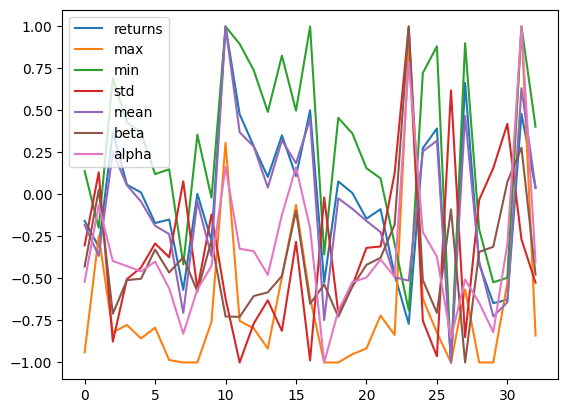

In [ ]:
pd.DataFrame(X_COMP_TRAIN[0], columns = ['returns', 'max', 'min', 'std', 'mean', 'beta', 'alpha']).plot()

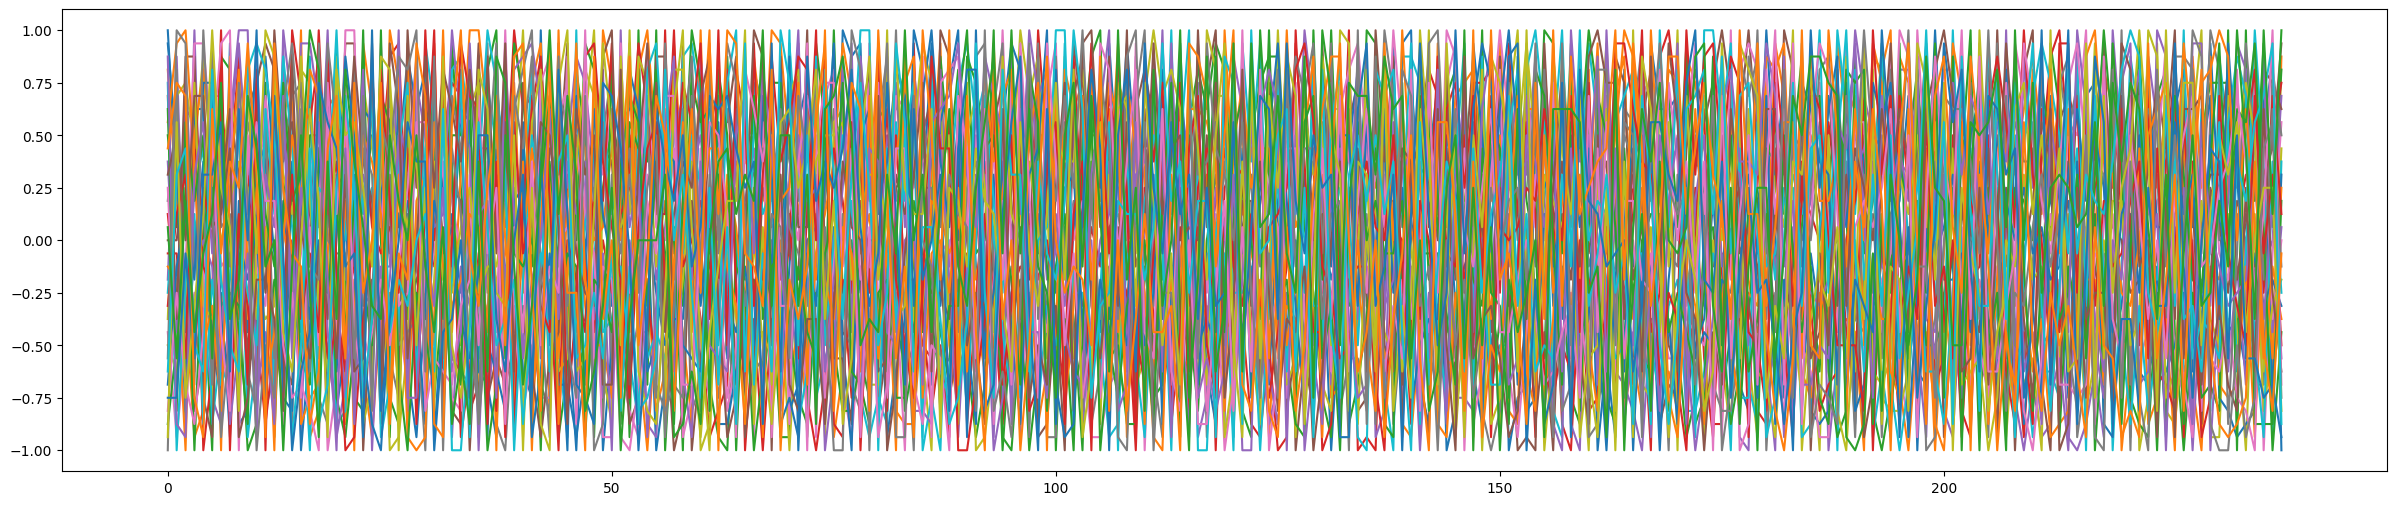

In [ ]:
plt.figure(figsize=(30, 6))
plt.plot(pd.DataFrame(Y_COMP_TRAIN , columns=data_componentes_IBEX.columns).iloc[:,:] );

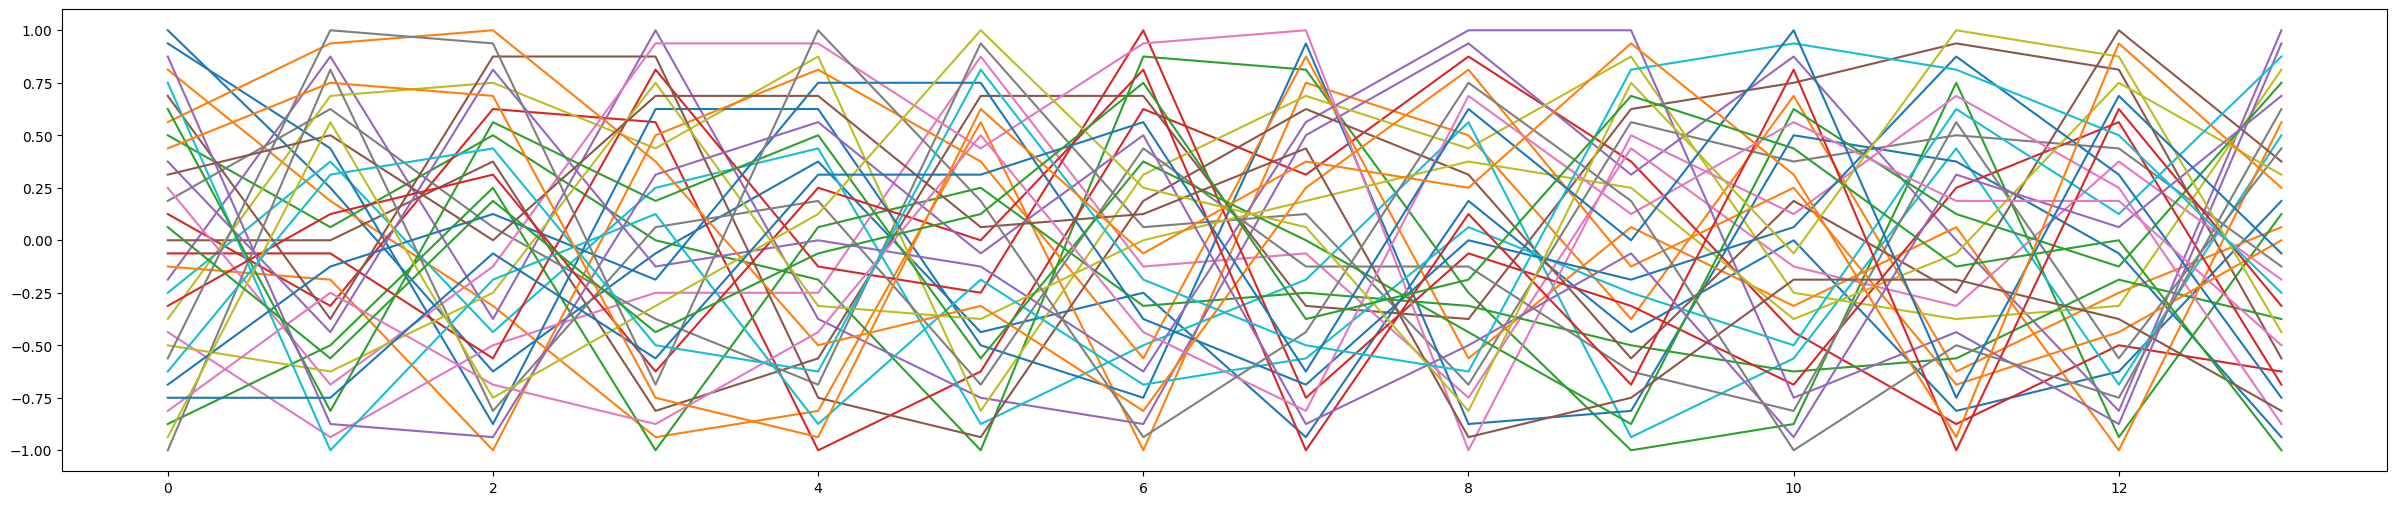

In [ ]:
plt.figure(figsize=(30, 6))
plt.plot(pd.DataFrame(Y_COMP_TRAIN[:14] , columns=data_componentes_IBEX.columns).iloc[:,:] );

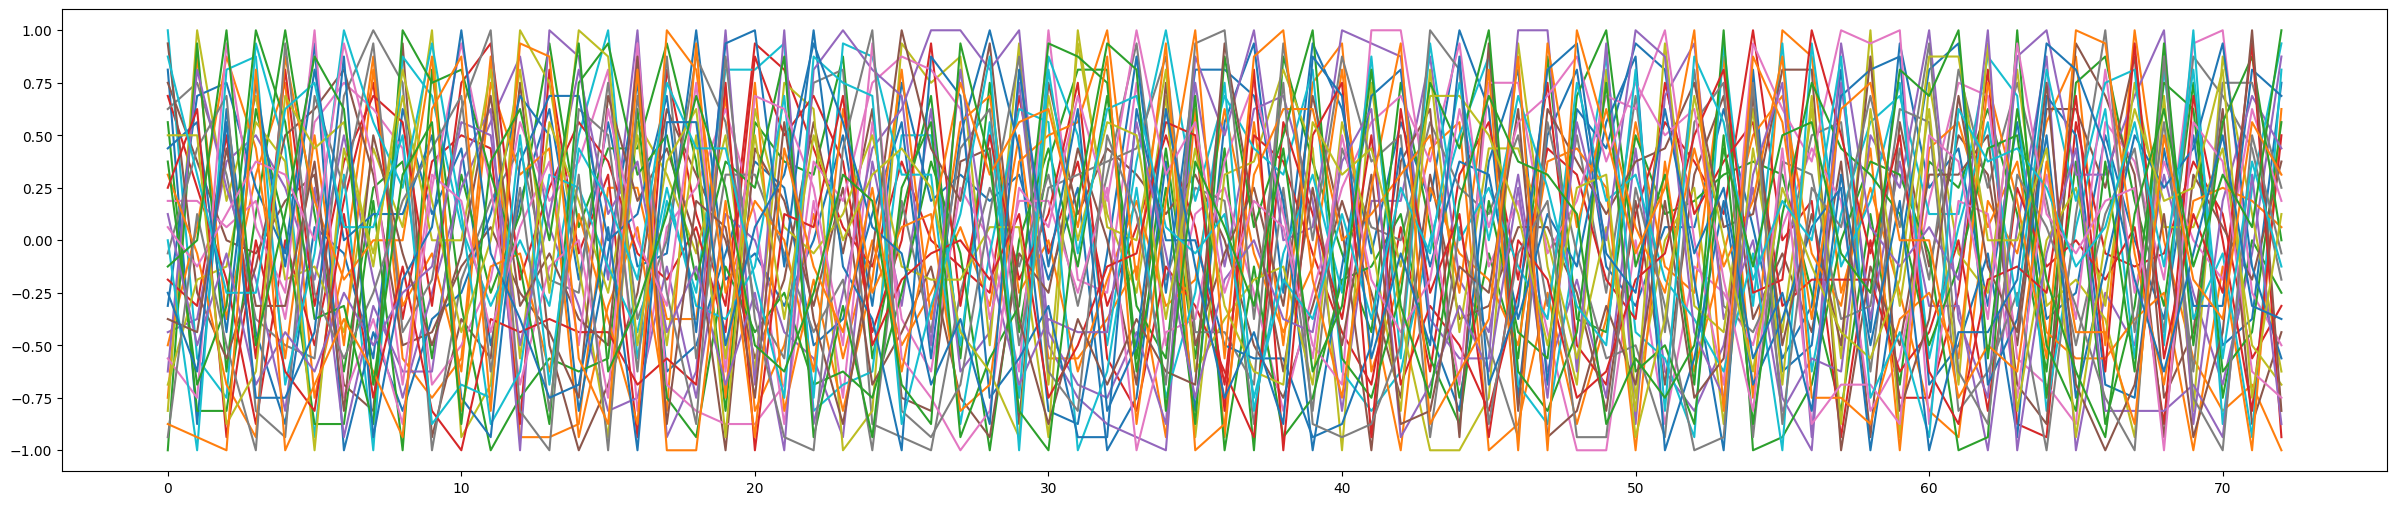

In [ ]:
plt.figure(figsize=(30, 6))
plt.plot(pd.DataFrame(Y_COMP_VALID , columns=data_componentes_IBEX.columns).iloc[:,:] );

In [ ]:
X_COMP_TRAIN.shape , Y_COMP_TRAIN.shape, Y_REAL_FORWARD_SHARPE_TRAIN.shape, X_COMP_POS_TRAIN.shape

((239, 33, 7), (239, 33), (239, 33), (239, 33))

In [ ]:
X_COMP_VALID.shape , Y_COMP_VALID.shape, Y_REAL_FORWARD_SHARPE_VALID.shape, X_COMP_POS_VALID.shape

((73, 33, 7), (73, 33), (73, 33), (52, 33))

In [ ]:
X_COMP_TEST.shape  , Y_COMP_TEST.shape , Y_REAL_FORWARD_SHARPE_TEST.shape , X_COMP_POS_VALID.shape

((52, 33, 7), (52, 33), (52, 33), (52, 33))

In [ ]:
np.concatenate((X_COMP_TRAIN, X_COMP_VALID), axis=0).shape

(312, 33, 7)

# REGLAS EVOLUTIVO

In [ ]:
import random
import numpy as np
import keras
from tensorflow.keras.layers import Dense, Dropout, Flatten, SpatialDropout1D, BatchNormalization, Concatenate
from keras import regularizers
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.callbacks import EarlyStopping
import time
from keras import backend as K
import tensorflow as tf

In [ ]:
class evo_ranking():
  def __init__(self):

    self.gen_dic = {
        "neuronas_A" : [1],#"neuronas_A" : [1,2,3,4],
        "l1_A" : [0.25,0.5],
        "l2_A" : [0.5, 0.75, 0.9],
        "dropput_A" : [0.99],            #"dropput_A" : [0, 0.5, 0.9],
        "layers_A" : [1,2],
        "begin_dropput" : [0.99],        #"begin_dropput" : [0,0.5, 0.9],
        "bach_norm_begin_A" : [0, 1],
        "bach_norm_layers_A" : [0, 1],

    }

    self.historical = self.historical = {key: {} for key in self.gen_dic.keys()}

  def initial_population(self , population_size):
    "crear n arrays (population_size) con valores aleatorios escogidos de self.gen_dic "
    population = []
    for _ in range(population_size):
        individual = [random.choice(values) for _, values in self.gen_dic.items()]
        population.append(individual)
    return np.array(population)


  def count_occurrences(self, values, population):
      return {value: np.sum(population == value) for value in values}

  def count_gen(self, pop, generation):

    counts = {}
    keys = list(evo.gen_dic.keys())

    for i in range(len(self.gen_dic)):
      #print(i)

      #print(self.gen_dic[keys[i]])

      counts[keys[i]] = self.count_occurrences(self.gen_dic[keys[i]], pop[:, i])

    for i in range(len(counts)):

      self.historical[keys[i]][generation] = counts[keys[i]]


  def show_historical(self):

    h =  {key: {} for key in self.gen_dic.keys()}

    fig, axs = plt.subplots(len(self.gen_dic), 1, figsize=(10, 20))
    _keys = list(self.historical.keys())

    for i in range(len(self.historical)):
      #print(i)

      h[_keys[i]] = pd.DataFrame(self.historical[_keys[i]]).T

    for i in range(len(self.historical)):

      for column in h[_keys[i]].columns:

        axs[i].plot(h[_keys[i]][column], label=str(column))

      axs[i].set_title(_keys[i])
      axs[i].set_ylabel('N_MODELS')
      axs[i].set_xlabel('GENERACIONES')
      axs[i].legend()

    plt.tight_layout()
    plt.show()


  def create_model(self, individuo, X_TRAIN, Y_TRAIN, _learning_rate=0.01 ):

    hp_neuronas_densa = individuo[0]
    hp_l1_densa = individuo[1]
    hp_l2_densa = individuo[2]
    hp_dropput_densa = individuo[3]
    hp_layers = individuo[4]
    hp_begin_dropput = individuo[5]
    hp_bach_norm_begin = individuo[6]
    hp_bach_norm_layers = individuo[7]


    # ----------- A ----------

    inputs_A = keras.Input(shape=(X_TRAIN.shape[1:]))
    m_A = inputs_A

    m_A = Dropout(hp_begin_dropput)(m_A)
    if hp_bach_norm_begin == 1: m_A = BatchNormalization()(m_A)

    for i in range(int(hp_layers)):
      m_A = Dense(units=hp_neuronas_densa, activation='tanh', kernel_regularizer=regularizers.l1_l2(l1=hp_l1_densa, l2=hp_l2_densa))(m_A)

      m_A = Dropout(hp_dropput_densa)(m_A)
      if hp_bach_norm_layers == 1: m = BatchNormalization()(m_A)


    # ------- EXIT --------
    m = Flatten()(m_A)
    out = Dense(Y_TRAIN.shape[1], activation='tanh')(m)


    model = keras.Model(inputs=inputs_A, outputs=out)

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=_learning_rate), loss='mse',
            metrics=[])

    return model

  def fitness_function(self,population, X_A_TRAIN,  Y_A_TRAIN, X_A_VALID,  Y_A_VALID, X_A_TEST, Y_A_TEST, epochs, patience = 50,  verbose = 0 ):

    fitness = np.empty(population.shape[0])

    for i in range(population.shape[0]):

          model = self.create_model(population[i],  X_A_TRAIN, Y_A_TRAIN )

          # Define el callback EarlyStopping
          early_stopping = EarlyStopping(monitor='val_loss', patience = patience, verbose=verbose, restore_best_weights=True)

          history = model.fit(X_A_TRAIN, Y_A_TRAIN,
                              #np.concatenate((X_A_TRAIN, X_A_VALID), axis=0), np.concatenate((Y_A_TRAIN, Y_A_VALID), axis=0),
                              epochs=epochs,
                              batch_size=X_A_TRAIN.shape[0],
                              validation_data=(X_A_VALID, Y_A_VALID),
                              #validation_split = 0.3,
                              #shuffle = True,
                              verbose=verbose,
                              callbacks=[early_stopping])

          f_valid = min(history.history['val_loss'])

          #f_test = model.evaluate(X_A_TEST, Y_A_TEST, verbose=0)

          #fitness[i] = (f_valid + f_test ) / 2
          fitness[i] = f_valid

    return fitness

  def uniform_crossover(self, parents, chance_flip = 0.5):

        def uniform_crossover(parent1, parent2):
            child1, child2 = parent1.copy(), parent2.copy()
            for i in range(len(parent1)):
                if np.random.uniform(0, 1) < chance_flip:  # Choose randomly
                    child1[i], child2[i] = child2[i], child1[i]  # Swap elements
            return child1, child2

        def easy_crossover(parents):
            parents = parents
            np.random.shuffle(parents)
            offspring = []
            for i in range(0, len(parents), 2):

                parent1 = parents[i]
                parent2 = parents[i+1]

                childs = uniform_crossover(parent1, parent2 )

                offspring.append(childs[0])
                offspring.append(childs[1])

            return offspring

        return np.array(easy_crossover(parents))

  def mutation(self, immigration ,offspring, chance_flip = 0.05):

        def uniform_crossover_mut(parent1, parent2):
            child1, child2 = parent1.copy(), parent2.copy()
            for i in range(len(parent1)):
                if np.random.uniform(0, 1) < chance_flip:  # Choose randomly
                    child1[i], child2[i] = child2[i], child1[i]  # Swap elements
            return child1, child2

        def easy_crossover(immigration , current_offspring):

            new_offspring = []
            for i in range(len(immigration)):

                parent1 = immigration[i]
                parent2 = current_offspring[i]

                childs = uniform_crossover_mut(parent1, parent2 )

                #new_offspring.append(childs[0])
                new_offspring.append(childs[1])

            return new_offspring

        return np.array(easy_crossover(immigration , offspring))


  def get_best_population(self, population, fitness, n_save_best_population):
    idx_best_pop = np.argsort(fitness)[::1][:n_save_best_population]
    return np.array(population)[idx_best_pop]

evo = evo_ranking()

In [ ]:
# mini test
evo.fitness_function(evo.initial_population(1),
                     X_COMP_TRAIN,  Y_COMP_TRAIN,
                     X_COMP_VALID , Y_COMP_VALID,
                     X_COMP_TEST , Y_COMP_TEST,
                     1, patience = 50,  verbose = 1 )

1/1 [==============================] - 1s 538ms/step - loss: 2.4415 - val_loss: 2.4413


array([2.44125724])

# EVOLUTIVO

In [ ]:

# actualizar el codigo para guardar el mejor de cada generacion, tanto fu sitness como el individuom y en cada generacion comparar si es mejor, si es asi guardar el nuevo
def evo_get_model():
  evo = evo_ranking()

  h_best_pop = evo_ranking()
  h_parents =  evo_ranking()
  h_pop =  evo_ranking()

  # Inicializar el mejor fitness global y el mejor individuo global
  best_global_fitness = float('inf')  # Se asume que buscas minimizar el fitness
  best_global_individual = None

  h_best_fitness = []
  h_top_fitness_mean = []

  n_generations = 2
  n_initial_population = 24
  n_epochs = 300
  n_best_pop = 3
  n_parents = 6
  n_chance_flip_crossover = 0.5
  n_chance_flip_mutation = 0.35
  n_immigration_population = 0
  n_callback_patience = 50

  pop = evo.initial_population(n_initial_population)
  new_pop = pop

  for i in range(n_generations):

    # Registra el tiempo inicial
    start_time = time.time()

    # STAR EVO
    pop = new_pop

    fitness = evo.fitness_function(pop,
                        X_COMP_TRAIN , Y_COMP_TRAIN,
                        X_COMP_VALID,  Y_COMP_VALID,
                        X_COMP_TEST,  Y_COMP_TEST,
                        n_epochs,
                        n_callback_patience,
                        verbose = 0 )

    best_pop = evo.get_best_population(pop, fitness, n_save_best_population = n_best_pop)

    parents = evo.get_best_population(pop, fitness, n_save_best_population = n_parents)

    offspring = evo.uniform_crossover(parents, chance_flip = n_chance_flip_crossover)

    gens_for_mutation = evo.initial_population(len(parents))
    mutated = evo.mutation(gens_for_mutation ,parents, chance_flip = n_chance_flip_mutation)

    immigration = evo.initial_population(n_immigration_population)

    new_pop = np.concatenate((offspring, mutated))
    new_pop = np.concatenate((new_pop, best_pop))
    if len(immigration) > 0: new_pop = np.concatenate((new_pop, immigration))


    # FIN EVO

    # Identificar el mejor fitness de la generación y el correspondiente individuo
    min_value_index = np.argmin(fitness)
    min_value = fitness[min_value_index]
    best_individual = pop[min_value_index]

    # Comparar con el mejor global
    if min_value < best_global_fitness:
        best_global_fitness = min_value
        best_global_individual = best_individual.copy()

    h_best_pop.count_gen( best_pop,  i)
    h_parents.count_gen(  parents,  i)
    h_pop.count_gen(      new_pop,  i)

    # Obtener el valor mínimo
    min_value = np.min(fitness)

    # Obtener la media de los 10 valores más pequeños
    sorted_values = np.sort(fitness)
    mean_of_10_smallest = np.mean(sorted_values[:n_parents])

    h_best_fitness.append(min_value)
    h_top_fitness_mean.append(mean_of_10_smallest)

    print("GENERACION : " , i + 1)
    print("best_fitness : " , min_value)
    print("mean_of_top : " , mean_of_10_smallest)
    print("POP LEN: ", len(pop))

    # Registra el tiempo final
    end_time = time.time()
    # Calcula la diferencia
    elapsed_time = end_time - start_time
    print(f"El código tomó {elapsed_time:.2f} segundos para ejecutarse.")

  # Gráfica para  h_best_fitness
  plt.plot(h_best_fitness)
  plt.title("h_best_fitness")
  plt.show()
  # Gráfica para  h_top_fitness_mean
  plt.plot(h_top_fitness_mean)
  plt.title("h_top_fitness_mean")
  plt.show()

  return best_global_individual, best_global_fitness, h_best_pop, h_parents, h_pop

GENERACION :  1
best_fitness :  0.3568268418312073
mean_of_top :  0.35712485512097675
POP LEN:  24
El código tomó 188.02 segundos para ejecutarse.
GENERACION :  2
best_fitness :  0.35691574215888977
mean_of_top :  0.3570694128672282
POP LEN:  15
El código tomó 122.50 segundos para ejecutarse.


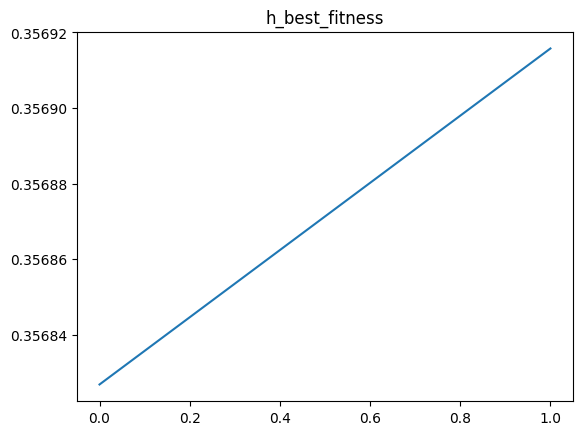

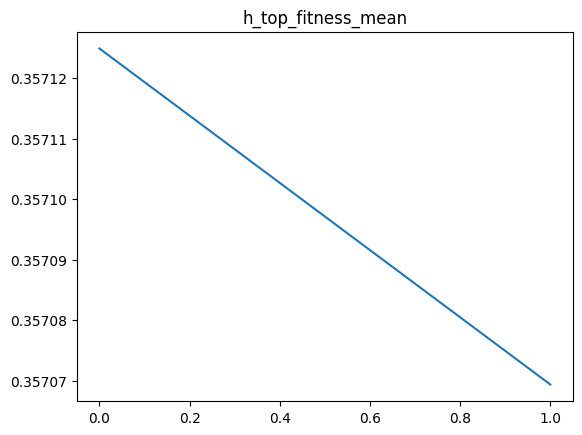

In [ ]:
best_global_individual, best_global_fitness, h_best_pop, h_parents, h_pop = evo_get_model()

# VISUALIZAMOS POBLACION POR GENERACIONES

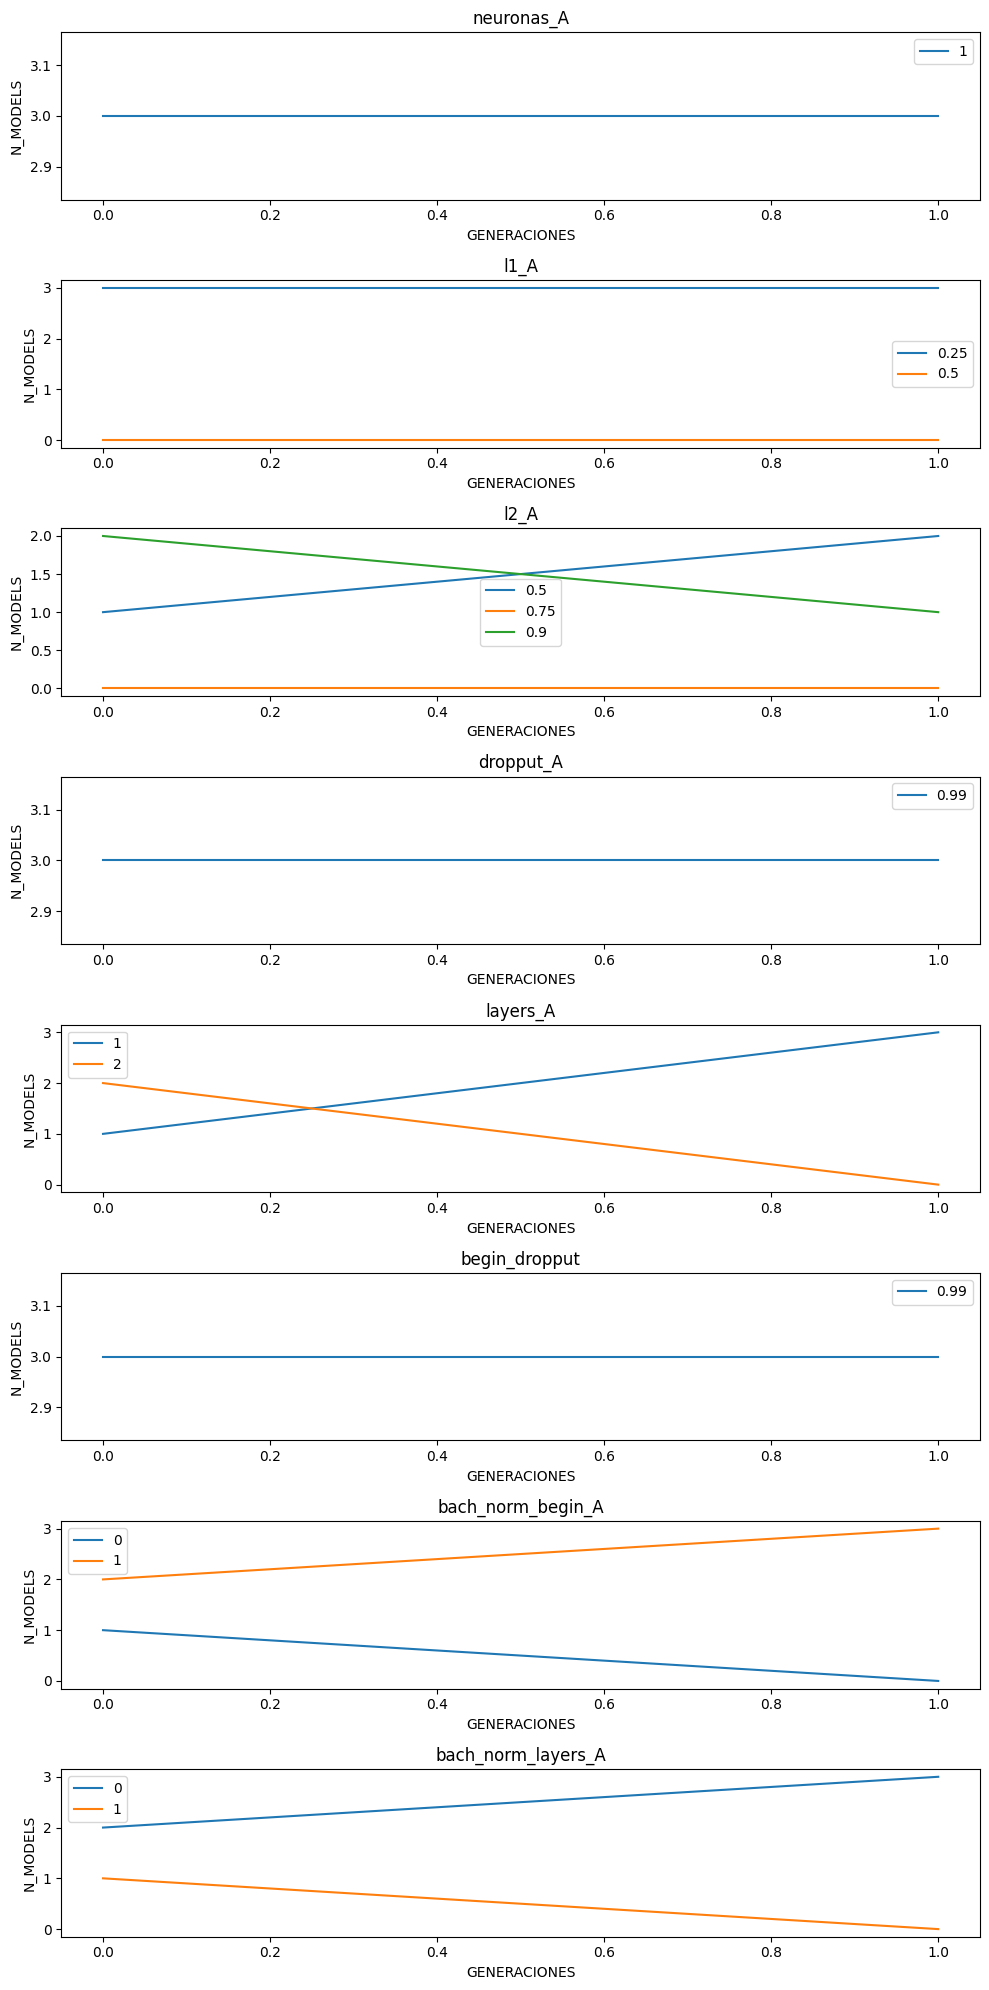

In [ ]:
h_best_pop.show_historical()

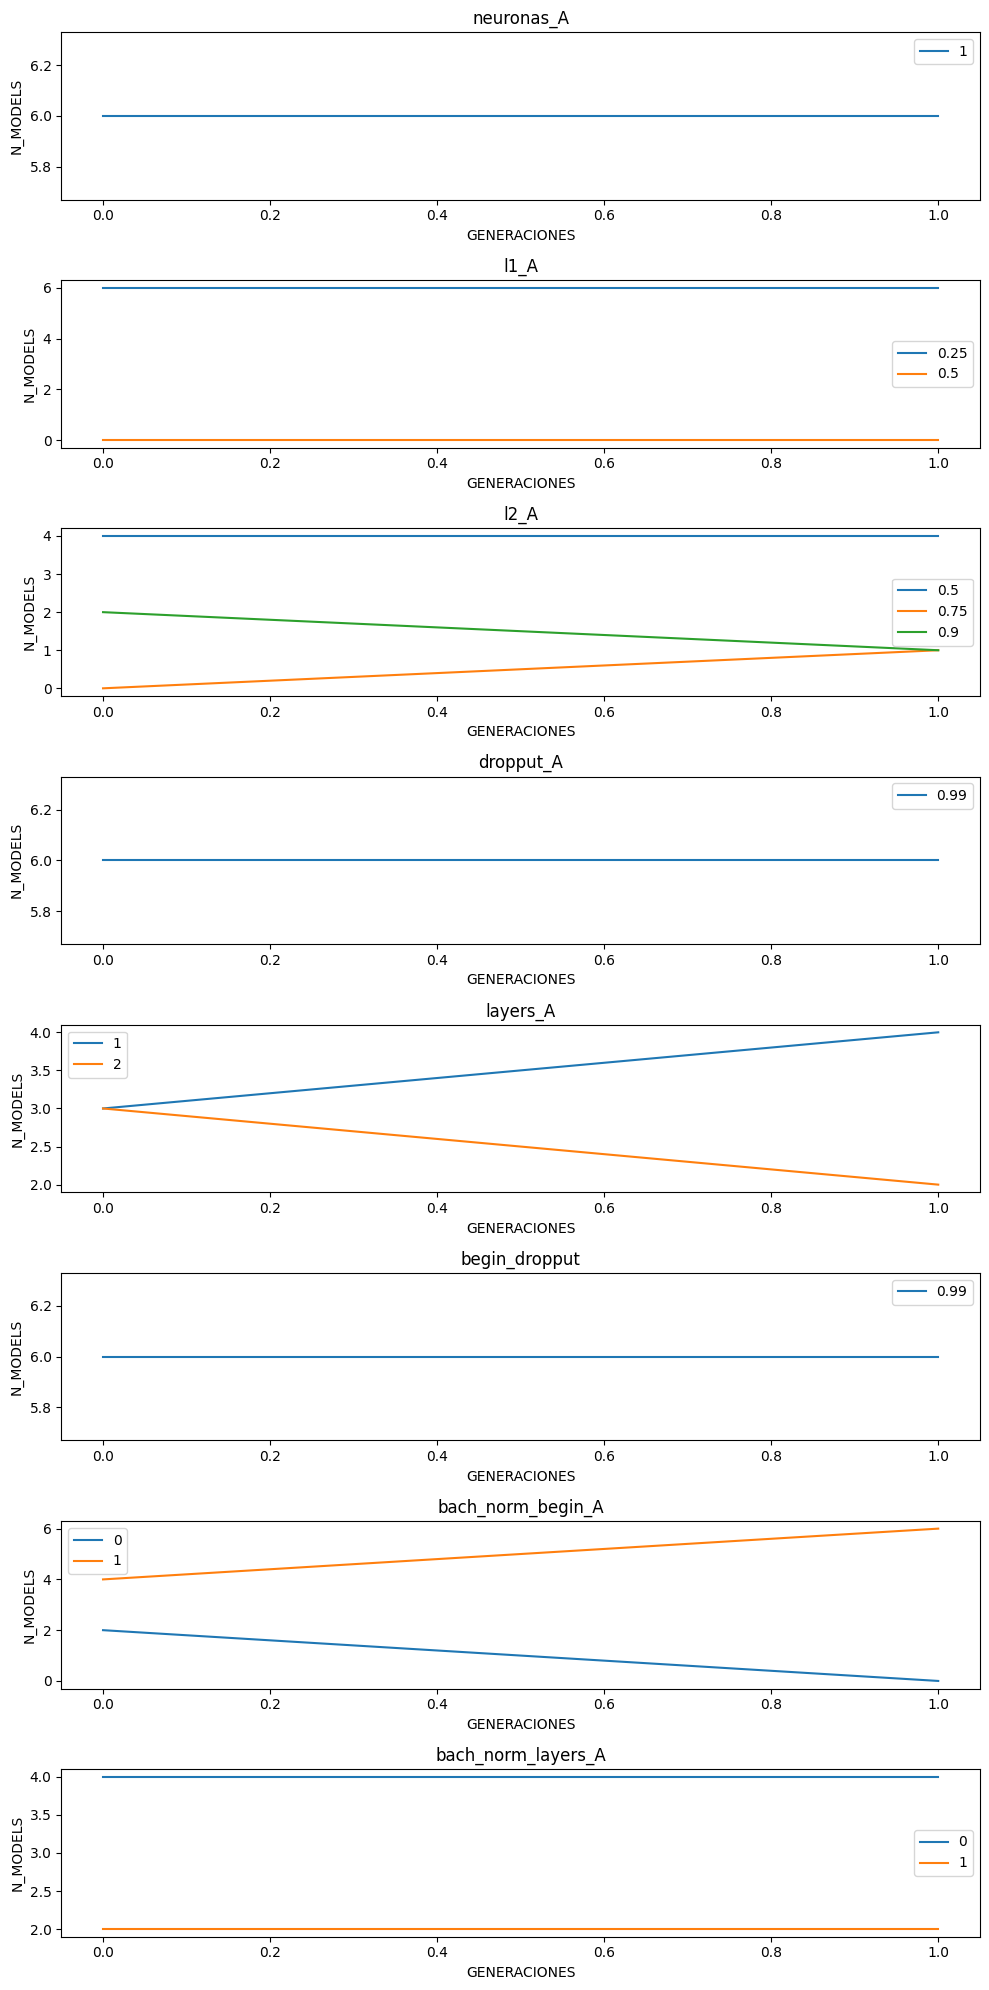

In [ ]:
h_parents.show_historical()

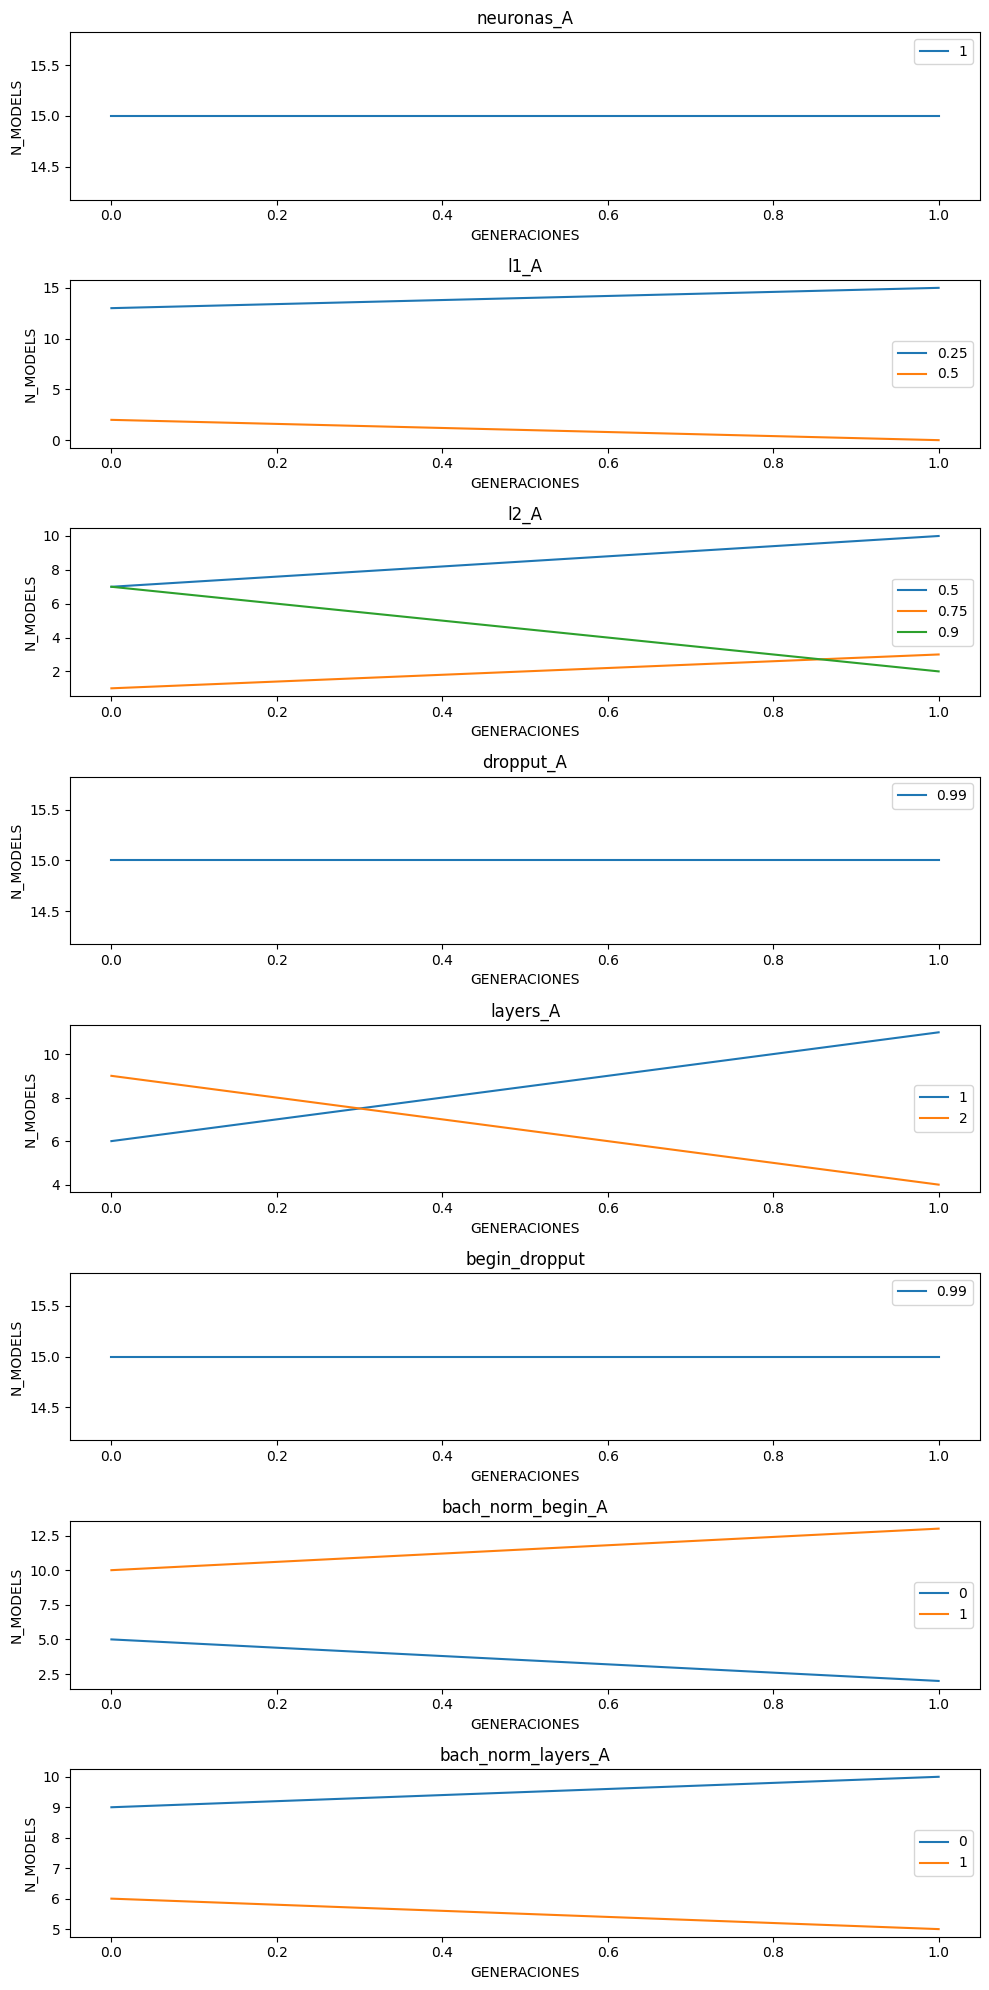

In [ ]:
h_pop.show_historical()

# Entrenamos el mejor

In [ ]:
X_COMP_TRAIN.shape

(239, 33, 7)

In [ ]:
import matplotlib.pyplot as plt
import keras
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping

In [ ]:
best_global_individual, best_global_fitness

(array([1.  , 0.25, 0.5 , 0.99, 1.  , 0.99, 1.  , 0.  ]), 0.3568268418312073)

In [ ]:

evo = evo_ranking()
model_a = evo.create_model(
    best_global_individual,
    X_COMP_TRAIN,
    Y_COMP_TRAIN,
    _learning_rate=0.01  )
model_a.summary()

Model: "model_261"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_263 (InputLayer)      [(None, 33, 7)]           0         
                                                                 
 dropout_764 (Dropout)       (None, 33, 7)             0         
                                                                 
 batch_normalization_389 (Ba  (None, 33, 7)            28        
 tchNormalization)                                               
                                                                 
 dense_764 (Dense)           (None, 33, 1)             8         
                                                                 
 dropout_765 (Dropout)       (None, 33, 1)             0         
                                                                 
 flatten_261 (Flatten)       (None, 33)                0         
                                                         

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience = 50, verbose=1, restore_best_weights=True)

history_model_a = model_a.fit(
                              X_COMP_TRAIN,
                              Y_COMP_TRAIN,
                              epochs=2000,
                              batch_size= 1,
                              validation_data=( X_COMP_VALID , Y_COMP_VALID),
                              verbose=1,
                              callbacks=[early_stopping]
                              )

Epoch 1/2000
239/239 [==============================] - 1s 2ms/step - loss: 0.5841 - val_loss: 0.3911
Epoch 2/2000
239/239 [==============================] - 0s 2ms/step - loss: 0.3982 - val_loss: 0.3970
Epoch 3/2000
239/239 [==============================] - 0s 2ms/step - loss: 0.4374 - val_loss: 0.4536
Epoch 4/2000
239/239 [==============================] - 0s 2ms/step - loss: 0.3903 - val_loss: 0.3612
Epoch 5/2000
239/239 [==============================] - 0s 2ms/step - loss: 0.4074 - val_loss: 0.4104
Epoch 6/2000
239/239 [==============================] - 0s 2ms/step - loss: 0.3827 - val_loss: 0.3703
Epoch 7/2000
239/239 [==============================] - 0s 2ms/step - loss: 0.3779 - val_loss: 0.3602
Epoch 8/2000
239/239 [==============================] - 0s 2ms/step - loss: 0.3654 - val_loss: 0.3607
Epoch 9/2000
239/239 [==============================] - 0s 2ms/step - loss: 0.3844 - val_loss: 0.3749
Epoch 10/2000
239/239 [==============================] - 0s 2ms/step - loss: 0.367

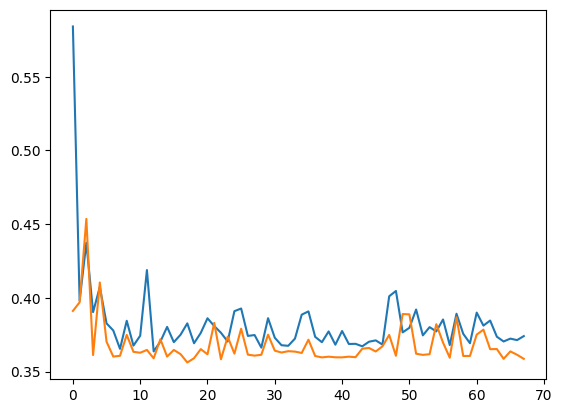

In [ ]:
plt.plot(history_model_a.history["loss"])
plt.plot(history_model_a.history["val_loss"])

# Vemos predicciones del mejor

In [ ]:
y_pred = model_a(X_COMP_TEST)

## HISTORICO RANKING REAL

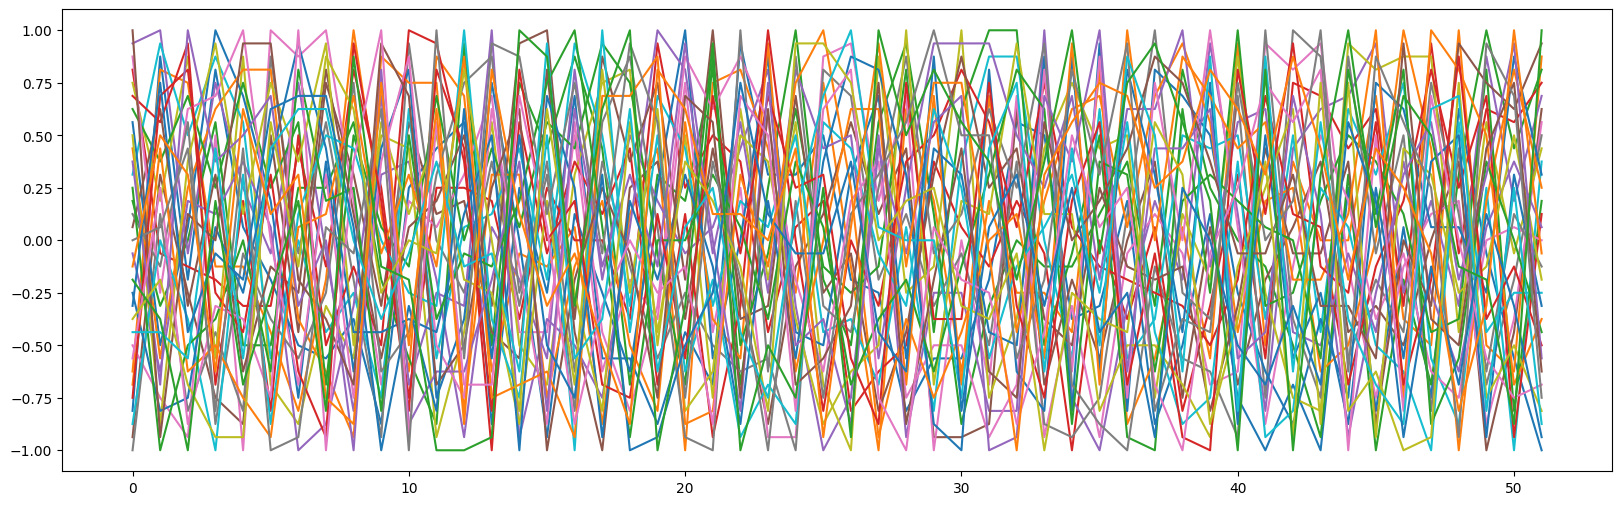

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(pd.DataFrame(Y_COMP_TEST , columns=data_componentes_IBEX.columns) );

## HISTORICO RANKING PRED

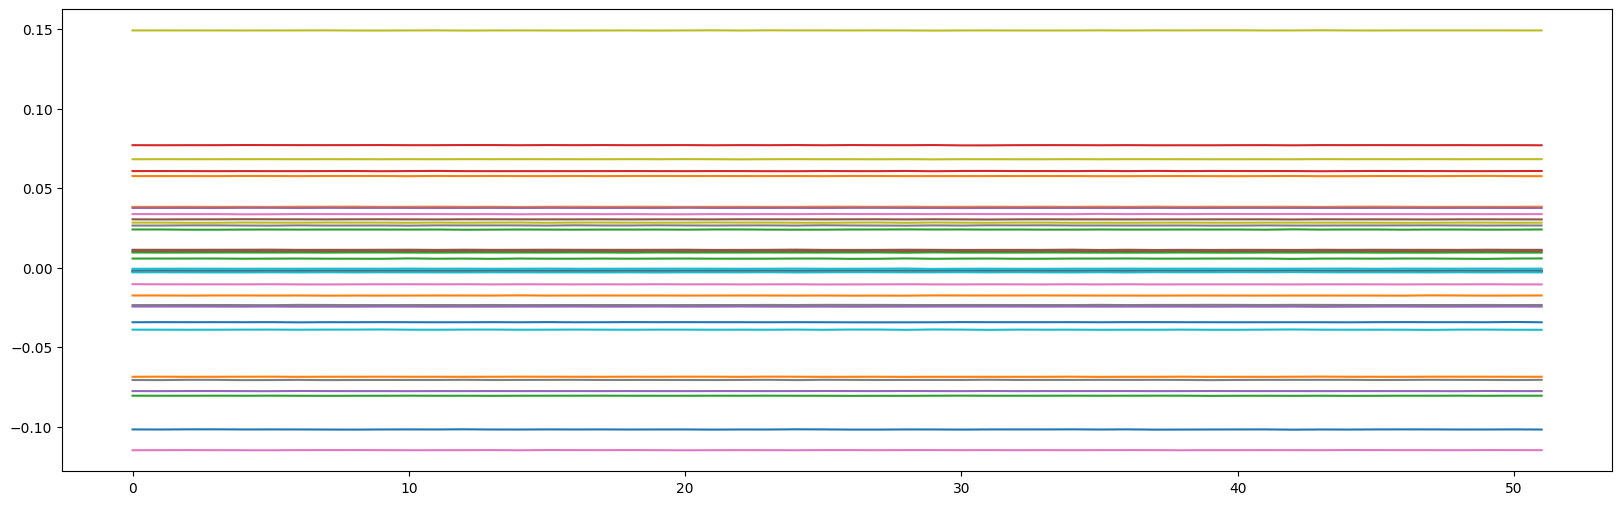

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot((pd.DataFrame(y_pred , columns=data_componentes_IBEX.columns) ));

# COMPARACION

In [ ]:
data_indices.columns

Index(['CNYEUR=X', 'GC=F', 'HG=F', 'USDEUR=X', '^GDAXI', '^GSPC', '^IBEX',
       '^STOXX50E'],
      dtype='object')

In [ ]:
# Guarda el modelo original
model_a.save('temp_model.h5')

In [ ]:
def fake_model(data, data_forward, top):
  # Obtener los índices de los elementos ordenados
  sorted_indices = np.argsort(data)
  top_10_indices = sorted_indices[-top:]
  return data_forward[top_10_indices].mean()

In [ ]:
model_standard = keras.models.load_model('temp_model.h5')
model_evo = keras.models.load_model('temp_model.h5')


In [ ]:
def ver_comparacion(_X_COMP_TEST, _Y_REAL_FORWARD_SHARPE_TEST, _Y_MACRO_REAL_FORWARD_SHARPE_TEST):

  top_activos = 8

  h_sharpe_model = []
  h_standard_model = []
  h_ibex = []

  for i in range(len(_X_COMP_TEST)):

    data = _X_COMP_TEST[i]
    sharpe = _X_COMP_TEST[i][:,5]
    data_forward = _Y_REAL_FORWARD_SHARPE_TEST[i]

    # fake_model
    avg_sharpe = fake_model(sharpe, data_forward, top_activos)
    h_sharpe_model.append(avg_sharpe)

    # standard_model
    s_y_pred = model_standard(np.array([data]))[0].numpy()
    sorted_indices = np.argsort(s_y_pred)
    sorted_indices_ = np.argsort(sorted_indices)
    idx_activos = np.where(sorted_indices_ < top_activos)
    avg_sharpe = _Y_REAL_FORWARD_SHARPE_TEST[i][idx_activos].mean()

    h_standard_model.append(avg_sharpe)

    # IBEX

    h_ibex.append(_Y_MACRO_REAL_FORWARD_SHARPE_TEST[i][6])

  h_sharpe_model = np.array(h_sharpe_model)
  h_standard_model = np.array(h_standard_model)
  h_ibex = np.array(h_ibex)

  plt.plot(h_sharpe_model, color = "red")
  plt.plot(h_standard_model, color = "green")
  plt.plot(h_ibex, color = "yellow")

  plt.show()

  plt.plot(h_sharpe_model.cumsum(), color = "red")
  plt.plot(h_standard_model.cumsum(), color = "green")
  plt.plot(h_ibex.cumsum(), color = "yellow")

  plt.show()

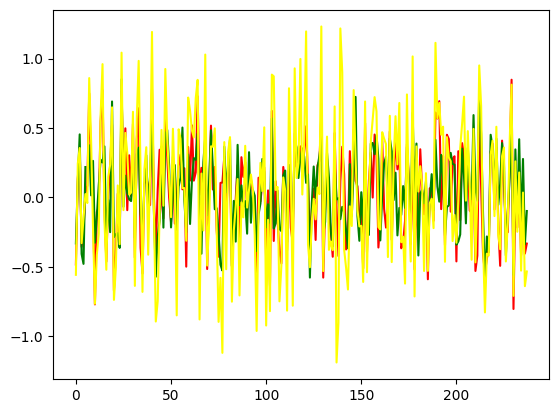

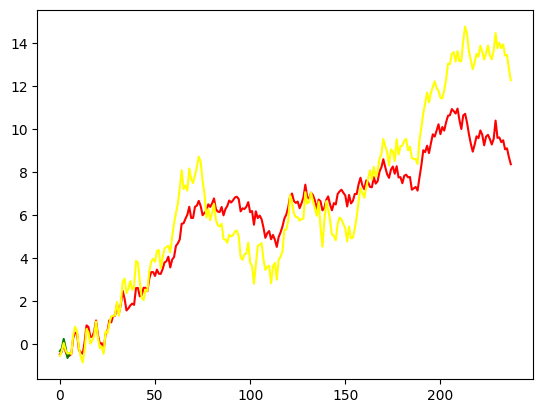

In [ ]:
ver_comparacion(X_COMP_TRAIN, Y_REAL_FORWARD_SHARPE_TRAIN, Y_MACRO_REAL_FORWARD_SHARPE_TRAIN)

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:180: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


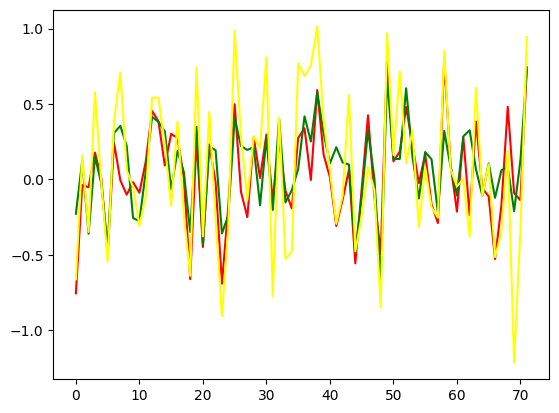

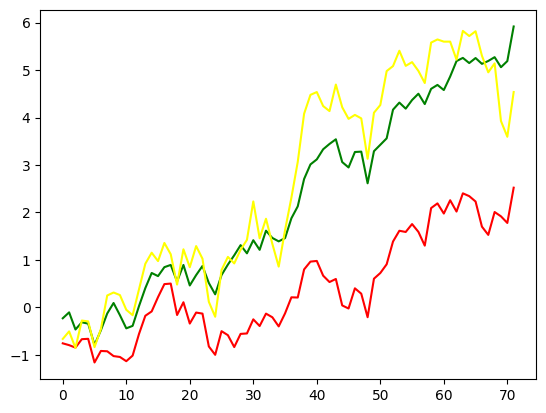

In [ ]:
ver_comparacion(X_COMP_VALID, Y_REAL_FORWARD_SHARPE_VALID, Y_MACRO_REAL_FORWARD_SHARPE_VALID)

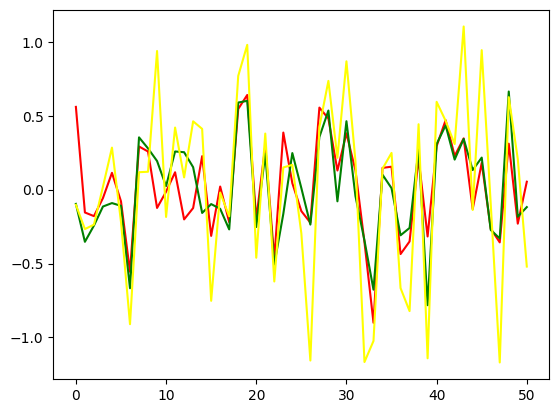

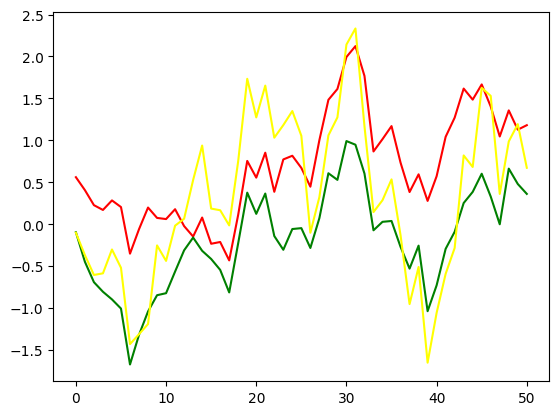

In [ ]:
ver_comparacion(X_COMP_TEST, Y_REAL_FORWARD_SHARPE_TEST, Y_MACRO_REAL_FORWARD_SHARPE_TEST)